<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/REGRESION/LABS/OLS_bivaritate_distribution(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# iván andrés trujillo abella
# ivantrujillo1229@gmail.com

In [48]:
# What happend if random not is used...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [53]:
url = "https://raw.githubusercontent.com/it-ces/PUBLIC-AI/main/REGRESION/cobb-douglas-firm.csv"
df = pd.read_csv(url)
df.drop(columns='Unnamed: 0', inplace=True)
df = df.apply(lambda x: np.log(x))
df  = df.apply(lambda row: row/df['L'])
df

,K,L,y
0,1.698674,1.0,1.549099
1,3.155319,1.0,2.808756
2,-14.777305,1.0,-11.381784
3,1.713613,1.0,1.766612
4,2.085698,1.0,1.953415
...,...,...,...
95,1.317381,1.0,1.316254
96,1.793000,1.0,1.648582
97,3.370691,1.0,2.995093
98,2.133495,1.0,2.108201


In [54]:
X  = df[['K']]
X = sm.add_constant(X, prepend=False)
# if the variables are logaritmically then are interpreted as elasticities..
mod=sm.OLS(df['y'], X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.529e+04
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          2.05e-109
Time:                        19:59:12   Log-Likelihood:                -44.151
No. Observations:                 100   AIC:                             92.30
Df Residuals:                      98   BIC:                             97.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
K              0.8106      0.007    123.633      0.0

In [51]:
## Simulating statistical properties of variance and expected value
b1 = 13.5
b0 = 3.44
sigma_squared = 12
sample = 35
X = np.linspace(-5,5, sample)
trials = 100000

def fit_parameters(x,y):
    y_mean = np.mean(y)
    x_mean = np.mean(x)
    return np.sum((x - x_mean) * (y - y_mean)) /  np.sum((x - x_mean) ** 2)

estimations = []
for _ in range(trials):
    # Generate a new error term for each trial
    error = np.random.normal(0, np.sqrt(sigma_squared), sample)
    y = b0 + b1 * X + error

    # Randomly sample indices and estimate b1
    estimations.append(fit_parameters(X, y))
sampling_mean = np.mean(estimations)
empirical = np.var(estimations, ddof=1)
theorical = sigma_squared / np.sum((X - np.mean(X))**2)
empirical, theorical
print(r'expected value of slope$', sampling_mean,  'difference in varaince theorical and empirical', (abs((empirical - theorical) )/theorical)*100 )

expected value of slope$ 13.499227306846372 difference in varaince theorical and empirical 0.1862886937230123


Text(0.5, 1.0, 'Sampling distribution of $\\hat{\\beta}_{1} =  $13.5')

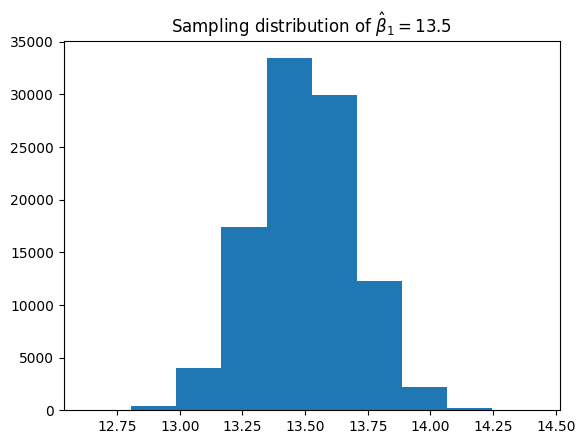

In [52]:
plt.hist(estimations)
plt.title(r"Sampling distribution of $\hat{\beta}_{1} =  $" + f"{round(sampling_mean,2)}")